Classify handwritten digits with k-NN
---

Exercise - Load dataset
--

> **Exercise**: Load the data from the `c4_mnist-6k.npz` file into X/y arrays. The data type of the input matrix `X` should be `float64`. Split it into train (5,000 images) and test (1,000) sets using the `train_test_split()` function. Set the `random_state` to zero. 

In [3]:
data.files

['data', 'labels']

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data from the .npz file
data = np.load('c4_mnist-6k.npz')

# Extract the input matrix X and target vector y
X = data['data'].astype('float64')
y = data['labels']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=5000, test_size=1000, random_state=0)

# Display the shapes of the resulting arrays
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5000, 784)
X_test shape: (1000, 784)
y_train shape: (5000,)
y_test shape: (1000,)


Exercise: Data exploration
---

> **Exercise**: What are the different categories? What is the proportion of images in each one?

In [11]:
y_series = pd.Series(y)
category_counts = y_series.value_counts()
category_proportions = y_series.value_counts(normalize=True)

print("\nCategories and their proportions:")
print(category_proportions)


Categories and their proportions:
1    0.111833
7    0.108500
4    0.103833
3    0.101333
6    0.101333
9    0.100167
0    0.098667
2    0.096833
8    0.091833
5    0.085667
Name: proportion, dtype: float64


> **Exercise**: Plot some images with their labels from the X/y arrays.

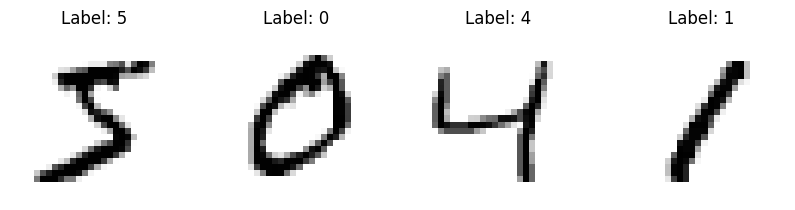

In [13]:
import matplotlib.pyplot as plt

num_images=4

plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray_r')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()

Exercise: Set a baseline
---

> **Exercise**: Create a baseline model using the `DummyClassifier` object from Scikit-learn and evaluate its performance on the test set.

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=5000, test_size=1000, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dummy_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy of the baseline model: {accuracy}")
print("\nClassification Report:")
print(report)

Accuracy of the baseline model: 0.105

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.10      1.00      0.19       105
           2       0.00      0.00      0.00        89
           3       0.00      0.00      0.00       121
           4       0.00      0.00      0.00        95
           5       0.00      0.00      0.00        83
           6       0.00      0.00      0.00       108
           7       0.00      0.00      0.00       117
           8       0.00      0.00      0.00        88
           9       0.00      0.00      0.00       108

    accuracy                           0.10      1000
   macro avg       0.01      0.10      0.02      1000
weighted avg       0.01      0.10      0.02      1000



/home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

Exercise: Create k-NN classifier
---

> **Exercise**: Build a k-NN classifier using a `Pipeline` object (set k to 5). Try with and without standardization.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline with standardization
pipeline_with_scaler = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Create a pipeline without standardization
pipeline_without_scaler = Pipeline([
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Train and evaluate the model with standardization
pipeline_with_scaler.fit(X_train, y_train)
y_pred_with_scaler = pipeline_with_scaler.predict(X_test)
accuracy_with_scaler = accuracy_score(y_test, y_pred_with_scaler)

print("With Standardization:")
print(f"Accuracy: {accuracy_with_scaler}")

# Train and evaluate the model without standardization
pipeline_without_scaler.fit(X_train, y_train)
y_pred_without_scaler = pipeline_without_scaler.predict(X_test)
accuracy_without_scaler = accuracy_score(y_test, y_pred_without_scaler)

print("\nWithout Standardization:")
print(f"Accuracy: {accuracy_without_scaler}")

With Standardization:
Accuracy: 0.899

Without Standardization:
Accuracy: 0.941


Exercise: Tune k using grid search
---

> **Exercise**: Tune k using grid search. Plot the test accuracy.

**Hint**: You don't have to compute the train accuracy which is computationally expensive due to the size of the train set.

Best k: 7
Best cross-validated accuracy: 0.8906000000000001
Test accuracy with best k: 0.899


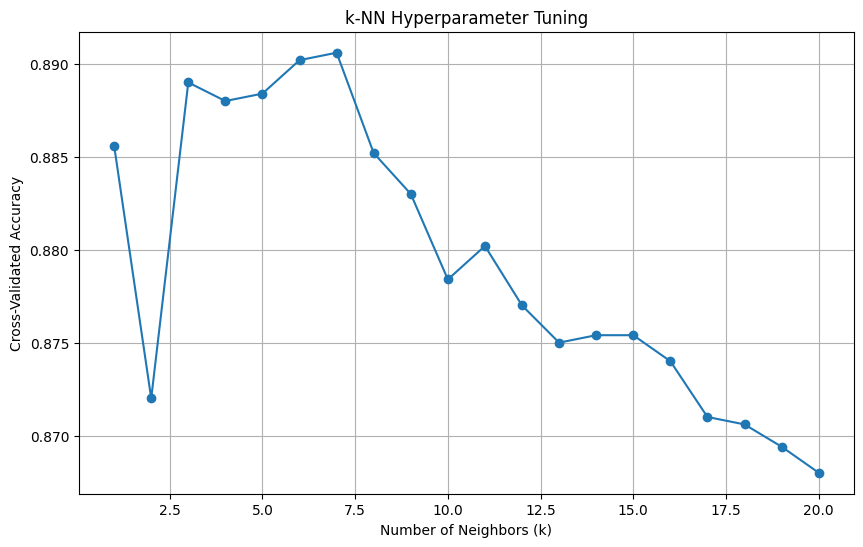

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for k
param_grid = {'knn__n_neighbors': np.arange(1, 21)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline_with_scaler, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameter and the corresponding accuracy
best_k = grid_search.best_params_['knn__n_neighbors']
best_accuracy = grid_search.best_score_

print(f"Best k: {best_k}")
print(f"Best cross-validated accuracy: {best_accuracy}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test accuracy with best k: {test_accuracy}")

# Plot the test accuracy for different values of k
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(param_grid['knn__n_neighbors'], mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('k-NN Hyperparameter Tuning')
plt.grid(True)
plt.show()